## Observations and Insights

Capomulin and Ramicane had a significantly lower final tumor volume that the other drugs.
The weight of the mouse had a direct impact on the size of the tumor
The Capomulin teatments reduce the tumor size over time insead of all at onces

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df=pd.DataFrame({
    'Mean':data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean(),
    'Median':data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median(),
    'Variance':data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var(),
    'Standard Deviation':data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std(),
    'SEM':data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()}
)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

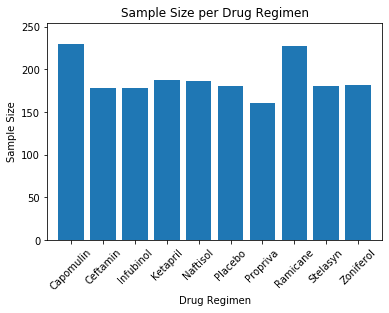

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data=data_df.groupby('Drug Regimen')['Mouse ID'].count()
#Drug Labels
x_axis=np.arange(len(data))
data.plot.bar(width=0.8)
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations, sorted(data_df['Drug Regimen'].unique()), Rotation=45)
# Set axies
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(data)+25)
# Title
plt.title("Sample Size per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Sample Size")
plt.show()

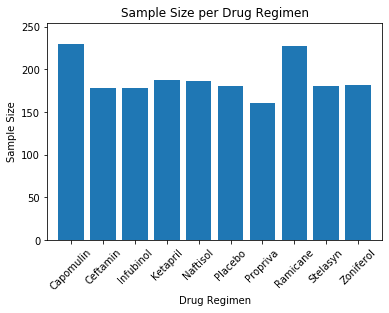

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(x_axis,data,width=0.8)
#Drug Labels
plt.xticks(tick_locations, sorted(data_df['Drug Regimen'].unique()), Rotation=45)
# Set axies
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(data)+25)
# Title
plt.title("Sample Size per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Sample Size")
plt.show()

## Pie plots

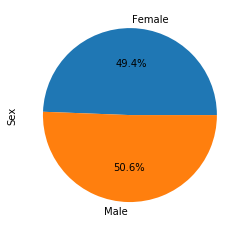

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_gen=data_df.groupby('Sex')['Mouse ID'].count()
data_gen.plot.pie(autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

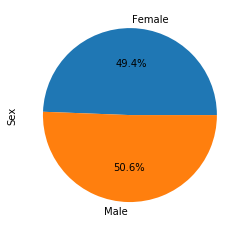

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(data_gen, labels=sorted(data_df['Sex'].unique()),autopct="%1.1f%%", startangle=0)
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Prepare Data and data structures
index = data_df.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].transform(max) == data_df['Timepoint']
maxes=data_df[index]
drug_data=[]
final=pd.DataFrame({})
# Decide which drugs to look into
drugs=['Capomulin','Ceftamin','Infubinol','Ramicane']
# Find data for each drug
for drug in drugs:
    # Pull data for each regimen
    index = drug == maxes['Drug Regimen']
    temp=maxes[index]
    temp=temp['Tumor Volume (mm3)']
    drug_data.append(temp)
    # Calculate Quartiles
    quartiles = temp.quantile([.25,.5,.75])
    iqr=quartiles[0.75]-quartiles[0.25]
    lower_bound=quartiles[.25]-(1.5*iqr)
    upper_bound=quartiles[.75]+(1.5*iqr)
    # Find Outliers
    outliers=[]
    for sample in temp:
        if sample >upper_bound or sample<lower_bound:
            outliers.append(sample)
    outliers= [str(round(i,2)) for i in outliers] 
    outliers=' , '.join(outliers)
    # Construct final data frame
    thissample=pd.DataFrame({'Drug Regimen': drug,
                             'Lower Quartile': quartiles[0.25],
                             'Upper Quartile': quartiles[0.75],
                             'IQR':iqr,
                             'Lower Bound': lower_bound,
                             'Upper Bound': upper_bound,
                             'Outliers': outliers },
                            index=[drug]
                           )
    final=pd.concat([final,thissample], ignore_index=True)
final

,Drug Regimen,Lower Quartile,Upper Quartile,IQR,Lower Bound,Upper Bound,Outliers
0,Capomulin,32.377357,40.159220,7.781863,20.704562,51.832015,
1,Ceftamin,48.722078,64.299830,15.577752,25.355450,87.666458,
2,Infubinol,54.048608,65.525743,11.477135,36.832905,82.741446,36.32
3,Ramicane,31.560470,40.659006,9.098537,17.912664,54.306811,


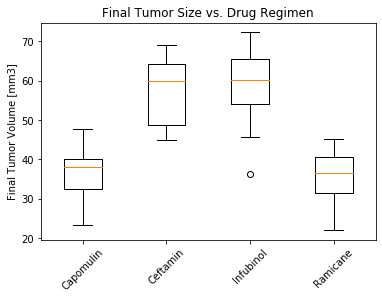

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 =plt.subplots()
#Title
ax1.set_title('Final Tumor Size vs. Drug Regimen')
ax1.set_ylabel('Final Tumor Volume [mm3]')
ax1.boxplot(drug_data)
# Regimen Labels
x_axis=np.arange(len(drugs))
tick_locations=[value+1 for value in x_axis]
plt.xticks(tick_locations, drugs, Rotation=45)
plt.show()

## Line and scatter plots

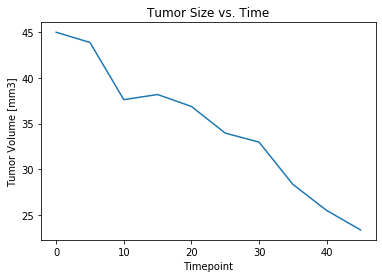

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Pull Data for capomulin
index = 'Capomulin' == data_df['Drug Regimen']
cap_data=data_df[index]
# Pull data for just the first mouse of Capomulin
single_mouse=cap_data.iloc[0]['Mouse ID']
index = single_mouse == cap_data['Mouse ID']
single_mouse=cap_data[index]
# Plot and Title
plt.plot(single_mouse['Timepoint'],single_mouse['Tumor Volume (mm3)'])
plt.title("Tumor Size vs. Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume [mm3]")
plt.show()

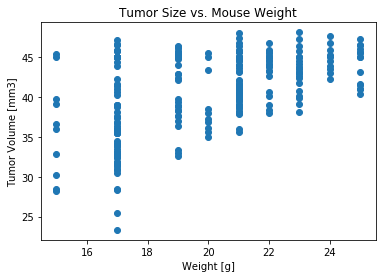

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(cap_data['Weight (g)'],cap_data['Tumor Volume (mm3)'])
plt.title("Tumor Size vs. Mouse Weight")
plt.xlabel("Weight [g]")
plt.ylabel("Tumor Volume [mm3]")
plt.show()

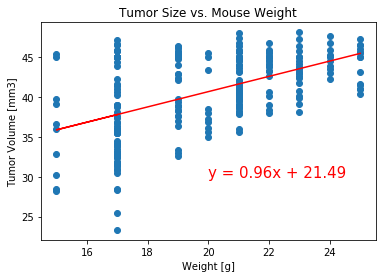

The correlation value is 0.53
The r^2 value is 0.53


In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# Calculate correlation and regression
correlation = st.pearsonr(cap_data['Weight (g)'],cap_data['Tumor Volume (mm3)'])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_data['Weight (g)'],cap_data['Tumor Volume (mm3)'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot new regression
plt.scatter(cap_data['Weight (g)'],cap_data['Tumor Volume (mm3)'])
regress_values = cap_data['Weight (g)'] * slope + intercept
plt.plot(cap_data['Weight (g)'],regress_values,"r-")
# Title
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.title("Tumor Size vs. Mouse Weight")
plt.xlabel("Weight [g]")
plt.ylabel("Tumor Volume [mm3]")
plt.show()
# Print variables
print(f'The correlation value is {round(correlation[0],2)}')
print(f'The r^2 value is {round(rvalue,2)}')